# Quantitative Macroeconomics - Homework II
Ivana Kaloyanova Ganeva

*October 10, 2020*

In [2]:
# SOME PRELIMINARIES:
# (loading the necessary libraries)
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## Qustion 1. A Representative Agent Economy
Within this question, we are asked to consider the closed optimal growth economy populated by a large number of identical infinitely-lived households which maximize:
$$\mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\}$$
over consumption and leisure, $u(c_t)=\log(c_t)$, subject to the constraints of:
\begin{align*}
c_t + i_t &= y_t\\
y_t &= k_t^{1-\theta}(zh_t)^{\theta}\\
i_t &= k_{t+1} - (1-\delta)k_t \, .
\end{align*}
As required, I will set labour share at $\theta=0.67$, and will start with the value of $h_t=0.31$ for all $t$; the population growth is here considered to be $0$.

### a) The Steady-State
For this part of the exercise, we are originally asked to compute the steady-state; and to choose $z$ to match an annual capital-output ratio of $4$, and an investment-output ratio of $0.25$. However, for the latter, it will become clear that $z$ cancels out when we derive the explicit expressions of the ratios, and hence the steady-state in these scenarios will be independent of our choice on the productivity parameter $z$. Therefore, I will simply proceed to derive the steady-state corresponding to the ratios given, without 'controlling' for $z$.

#### Analytical Solution
It is clear that we can reduce the number of constraints by substituting the second and third binding constraints into the first one. That is, we can re-write the optimization problem of the representative household as:
\begin{align*}
&\max_{c_t, k_{t+1}} \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\}\\
&\text{s.t.} \quad c_t + k_{t+1} - (1-\delta)k_t = k_t^{1-\theta}(zh_t)^{\theta}, \quad \forall t \, .
\end{align*}

This formulation allows us to construct the Lagrangean function as follows:
$$
\mathcal{L}(c_t, k_{t+1}; \mu_t) = \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\} - \sum_{t=0}^{\infty}\mu_t\left(c_t + k_{t+1} - (1-\delta)k_t - k_t^{1-\theta}(zh_t)^{\theta}\right) \, .
$$

The respective First-Order Conditions read as:
\begin{align*}
[c_t]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial c_t} = 0 &\Leftrightarrow \beta^t u_c(c_t) - \mu_t = 0 \, ;\\
[k_{t+1}]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial k_{t+1}} = 0 &\Leftrightarrow -\mu_t + \mu_{t+1}\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right) = 0 \, .
\end{align*}

From this, one can proceed as usual to combine the respective F.O.C.s for $c_t$ and $c_{t+1}$ together with the expression above for $k_{t+1}$ to obtain the inter-temporal Euler equation for consumption. That is, we have that:
\begin{align*}
\dfrac{u_c(c_t)}{u_c(c_{t+1})} &= \beta\dfrac{\mu_{t}}{\mu_{t+1}}\\
\Longleftrightarrow \dfrac{u_c(c_t)}{u_c(c_{t+1})} &= \beta\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right) \, ,
\end{align*}

which after the substitution with $u_c(c) = \dfrac{1}{c}$ (by the log-utility given) becomes:
$$
c_{t+1} = \beta\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right)c_t \, .
$$

Once the steady-state is imposed on $c$ and $k$, we have that $c_{t+1}=c_t\equiv c_{ss}$ and this translates to 
$$
(1-\delta) + (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta} = \beta^{-1} \quad \text{at the st.s.}
$$

That is, for $k_{ss}$ it will hold that 
$$
k_{t+1}=k_t\equiv k_{ss} = \left(\dfrac{1-\theta}{1-\delta-\dfrac{1}{\beta}}\right)^{\dfrac{1}{\theta}}\cdot zh_t \, .
$$

This allows us to obtain the precise values for our variables/parameters that lead to the desired ratios of capital to output and of investment to output, once we normalize output to one. That is, once we set $y_{ss}$ to 1, we must obviously have $k_{ss}=4$ and $i_{ss} = 0.25$. Hence, once we substitute into the original constraints, i.e. into the law of motion of capital, the budget constraint, etc., we arrive at:

\begin{align*}
c_{ss} = y_{ss} - i_{ss} &\Longleftrightarrow \boldsymbol{c_{ss}} = 1-0.25 = 0.75 \,;\\
k_{ss}\delta^* = i_{ss} &\Longleftrightarrow \boldsymbol{\delta^*} = 0.25\cdot 0.25 = 0.0625\,;\\
z^* = \left(\frac{y_{ss}}{k_{ss}^{1-\theta}h_t^{\theta}}\right)^{\frac{1}{\theta}} &\Longleftrightarrow \boldsymbol{z^*} = \left(\frac{1}{4^{1-0.67}0.31^{0.67}}\right)^{\frac{1}{0.67}} = 1.629676 \,.
\end{align*}

where in the last of the calculations we substitute with the values for $\theta$ and $h_t$ given.

Within the next part of this question, I will proceed to check these calculations via an R code.

#### Computational Derivations
Below, I will provide the computational derivation of the steady state for the representative household model described above.

In [20]:
# STEP 1:
# Creating a function that calculates the Steady State values:
#   inputs: (the known parameters of)
#           - h_t (labour supply)
#           - theta (labour share)
#           - z (productivity)
#           (the desired ratios of)
#           - k_to_y (capital-output ratio)
#           - i_to_y (investment-output ratio)
#           & most importantly, the vector x containing all the s.s. variables
# [Based on the non-linear equations for constraints that we have in this model.]

# Defining the known parameters/ratios outside the function:
# (fsolve wouldn't work otherwise - if that was possible, I would instead type
# st_state_function <- function(x, h = 0.31, theta = 0.67, z, k_to_y = 4, i_to_y = 0.25)
# ...
#)

h = 0.31; theta = 0.67; k_to_y = 4; i_to_y = 0.25;
z = 1.629 # as suggested

def st_state_function(x):
  # The Five Constraints:
  #   (which will be equated to zero when obtaining the roots/solution)
  # - The Capital-Output Ratio:
  k_to_y_constr = k_to_y - (x[1]/x[2])
  # - The Investment-Output Ratio:
  i_to_y_constr = i_to_y - ((x[3]*x[1])/x[2])
  # - The Euler Equation:
  ee_constr = (1 - x[3] + (1-theta)*((z*h)**theta)*(x[1])**(-theta))*x[4]-1
  # - The Budget/Resource Constraint:
  b_constr = x[2] - x[0] - x[1]*x[3]
  # - Cobb-Douglas Production:
  cd_prod_constr = x[2] - (x[1]**(1-theta))*((z*h)**(theta))
  # For the five variables of: c_ss, k_ss, y_ss, delta, and beta
  # - these are five and not six since we can isolate i_ss as i_ss = k_ss*delta
  #   in the budget constraint
  # - also considering z to be a parameter rather than a variable
  #   [following the arguments in the analytical part - it cancels out]
  # - having put these variables into a vector x to match the syntax of the fsolve funct:
  # x = (c_ss, k_ss, y_ss, delta, beta)
  #     x[0]   x[1]  x[2]  x[3]   x[4]
  return [k_to_y_constr, i_to_y_constr, ee_constr, b_constr, cd_prod_constr]

# STEP 2: 
# Setting the initial guess:
x_0 = [0.7, 3.9, 1, 0.06, 0.95]
  # using the normalization y = 1 at the initial guess

# STEP 3: 
# Solving the function, i.e. finding the steady state numerically:
x_ss = fsolve(st_state_function, x_0)
print(x_ss)

# These are the steady state values for consumption, capital, output, delta and beta, respectively:

[0.74968885 3.99834054 0.99958513 0.0625     0.98039216]


In [22]:
# Calculating the investment in steady state using the relationship established analytically above:
i_ss = x_ss[3]*x_ss[1] # i.e. investment_ss = delta* . capital_ss
print(i_ss)

0.24989628364490718


### b) New Steady-State, $z'=2z$
For this part, one simply needs to change the initial value for $z$ and re-run the function defined above. That is presented in the following chunk.

In [23]:
z = 2*z # doubling the productivity parameter as required

x_ss_2 = fsolve(st_state_function, x_0)
i_ss_2 = x_ss_2[3]*x_ss_2[1]

print({'x_ss_2': x_ss_2, 'i_ss_2': i_ss_2})
# Once again, these are the values for consumption, capital, output, delta and beta, as well as for investment, resp.

{'x_ss_2': array([1.4993777 , 7.99668108, 1.99917027, 0.0625    , 0.98039216]), 'i_ss_2': 0.4997925672221337}


It is noticeable that the steady state values here have doubled for the case where we double the productivity parameter. Now, I will proceed to explore the transition paths from the first steady state to the second one, as required.

### c) The Transition
Here, we will explore the transition dynamics of the variables of interest when following the path from the first steady state with $z=1.629$ to the other, where the productivity parameter doubles.

In [33]:
# Setting the number of periods/iterations here:
n = 100

# For simplicity, let us define the Cobb-Douglas production function in the beginning:
def cd_prod(k,z):
    return (k**(1-theta))*((z*h)**theta)
    # theta and h will be fixed, as given; 
    # the variables here will be capital and z - since we are interested in the changes of capital following
                                            # the switch in the productivity parameter of z

# Now, using the combined constraint in the final formulation of the optimization problem of the RA,
# one can establish the Euler Equation as a function of the capital over two consecutive periods only.
# [Hence, we will need three Euler Equations in total to obtain all the values on the paths.]

# That is, we can first solve for the capital sequence, based on the Euler equation and our initial constraints.
k_ss = x_ss[1]
k_ss_2 = x_ss_2[1]
    # These are respectively the first and last values for capital - i.e. the end points for the two steady states.

beta = x_ss[4]
delta = x_ss[3]
    
def path_function(k):
    # Setting the first and last elements to match the two steady states:
    k[0] = k_ss
    k[n-1] = k_ss_2
    # Initializing the empty vector for the capital transitions:
    k_path = np.zeros(n)
    # Obtaining the middle elements:
    for i in range(0, n-2):
        if i == 0:
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[0], z) + (1-delta)*k[0] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[0], z))/(k[0]**(1-theta))))
            # bearing in mind that z now coincides with z', i.e. that it is doubled already
        elif i == (n-2):
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[n-1] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
        else:
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
    return(k_path)

# Solving for the capital transition path:
k_path = fsolve(path_function, np.linspace(4, 8, n))
    # Here, the initial value is a vector of 100 equally-distanced points on the real segment [4,8]
    # (where the latter interval is defined by the two steady state points)

# Obtaining the paths for the remaining variables of interest:
l_path = h*np.ones(n)
    # for the labour, knowing that the share remains the same (given)

y_path = cd_prod(k_path, z)
    # for the output

s_path = np.zeros(n)
for i in range(0,n-1):
    s_path[i] = k_path[i+1] - k_path[i]*(1-delta)
s_path[n-1] = s_path[n-2]
    # for the savings, where we smooth out the last step

c_path = y_path - s_path

Now, having computed the transition plots, I will proceed to plot them.

ValueError: x and y must have same first dimension, but have shapes (101,) and (100,)

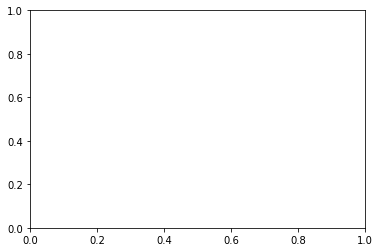

In [34]:
t = np.array(list(range(0,(n+1))))
    # this is the time vector marking the periods

# Capital
fig,ax = plt.subplots()    
ax.plot(t, k_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Capital Transition Path')
ax.set_ylabel('$k_t$')
ax.set_xlabel('t')
plt.show()

# Consumption
fig,ax = plt.subplots()    
ax.plot(t, c_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Consumption Transition Path')
ax.set_ylabel('Consumption')
ax.set_xlabel('t')
plt.show()

# Savings
fig,ax = plt.subplots()    
ax.plot(t, s_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Savings Transition Path')
ax.set_ylabel('Savings')
ax.set_xlabel('t')
plt.show()

# Labor
fig,ax = plt.subplots()    
ax.plot(t, l_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Labor Transition Path')
ax.set_ylabel('Labor')
ax.set_xlabel('t')
plt.show()

# Output
fig,ax = plt.subplots()    
ax.plot(t, y_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Output Transition Path')
ax.set_ylabel('Output')
ax.set_xlabel('t')
plt.show()